In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

RSEED = 88

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 8

import matplotlib.pyplot as plt
import seaborn as sns
import os
palette = sns.color_palette('Paired', 10)

In [2]:
data = pd.read_csv('TaxiFare1.csv', parse_dates = ['pickup_datetime']).drop(columns = 'key')
data


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21+00:00,-73.84,40.72,-73.84,40.71,1
1,16.90,2010-01-05 16:52:16+00:00,-74.02,40.71,-73.98,40.78,1
2,5.70,2011-08-18 00:35:00+00:00,-73.98,40.76,-73.99,40.75,2
3,7.70,2012-04-21 04:30:42+00:00,-73.99,40.73,-73.99,40.76,1
4,5.30,2010-03-09 07:51:00+00:00,-73.97,40.77,-73.96,40.78,1
...,...,...,...,...,...,...,...
100166,7.00,2014-09-13 17:05:00+00:00,-73.96,40.78,-73.97,40.76,4
100167,8.90,2012-02-04 18:48:25+00:00,-73.99,40.74,-74.00,40.76,4
100168,6.90,2012-06-22 19:16:00+00:00,-73.96,40.77,-73.97,40.75,1
100169,12.00,2014-01-10 19:12:00+00:00,-73.97,40.75,-73.99,40.74,1


In [3]:
data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [4]:
data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.50,2009-06-15 17:26:21+00:00,-73.84,40.72,-73.84,40.71,1
1,16.90,2010-01-05 16:52:16+00:00,-74.02,40.71,-73.98,40.78,1
2,5.70,2011-08-18 00:35:00+00:00,-73.98,40.76,-73.99,40.75,2
3,7.70,2012-04-21 04:30:42+00:00,-73.99,40.73,-73.99,40.76,1
4,5.30,2010-03-09 07:51:00+00:00,-73.97,40.77,-73.96,40.78,1


C:\Users\Aditya Dwivedi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Distribution of Fare')

<Figure size 1000x600 with 0 Axes>

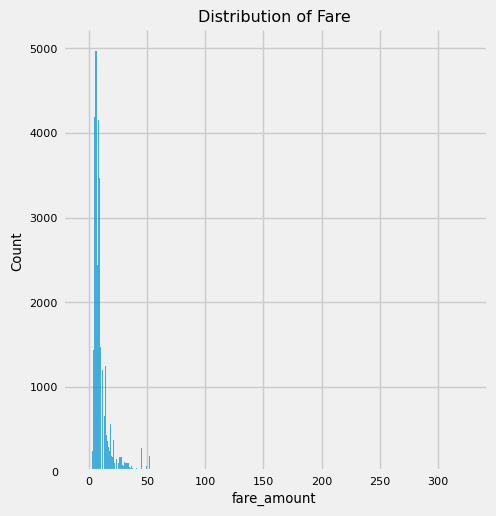

In [5]:
plt.figure(figsize=(10,6))
sns.displot(data['fare_amount'])
plt.title('Distribution of Fare')


In [45]:
print(f"There are {len(data[data['fare_amount'] < 0])} negative fares.")
print(f"There are {len(data[data['fare_amount'] == 0])} $0 fares.")
print(f"There are {len(data[data['fare_amount'] > 100])} fares greater than $100.")

There are 0 negative fares.
There are 0 $0 fares.
There are 0 fares greater than $100.


In [46]:
data.shape

(98046, 10)

In [47]:
data = data[data['fare_amount'].between(left = 2.5, right = 100)]
data.shape


(98046, 10)

In [48]:
df=pd.DataFrame({"x":[10,0,50,28,37,20,18,90,100,678,36,50]})

In [49]:
df['cut']=pd.cut(df['x'],bins=list(range(1,201,50))).astype(str)

In [50]:
df

,x,cut
0,10,"(1, 51]"
1,0,nan
2,50,"(1, 51]"
3,28,"(1, 51]"
4,37,"(1, 51]"
5,20,"(1, 51]"
6,18,"(1, 51]"
7,90,"(51, 101]"
8,100,"(51, 101]"
9,678,nan


In [51]:
df.loc[df['cut']=='nan','cut']='[200+]'

In [52]:
df

,x,cut
0,10,"(1, 51]"
1,0,[200+]
2,50,"(1, 51]"
3,28,"(1, 51]"
4,37,"(1, 51]"
5,20,"(1, 51]"
6,18,"(1, 51]"
7,90,"(51, 101]"
8,100,"(51, 101]"
9,678,[200+]


Text(0.5, 1.0, 'Fare Binned')

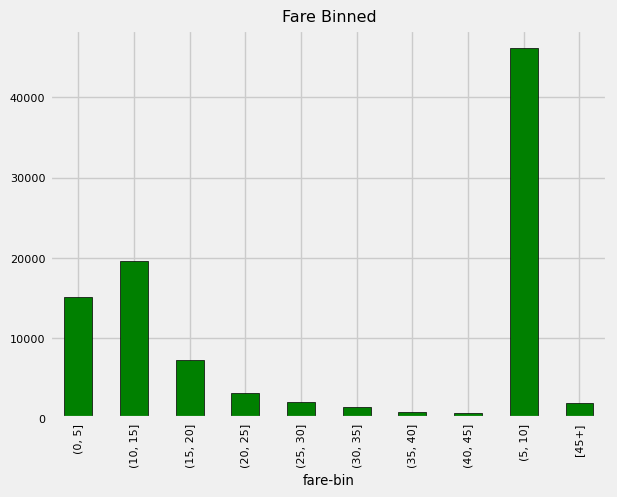

In [53]:
data['fare-bin'] = pd.cut(data['fare_amount'], bins = list(range(0, 50, 5))).astype(str)
data.loc[data['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'
data['fare-bin'].value_counts().sort_index().plot.bar(color = 'g', edgecolor = 'k');
plt.title('Fare Binned')

In [54]:
xs, ys = ecdf(np.logspace(0, 2))
plt.plot(xs, ys, '.');
plt.ylabel('Percentile'); 
plt.title('ECDF');



NameError: name 'ecdf' is not defined

In [55]:
xs, ys = ecdf(data['fare_amount'])
plt.figure(figsize = (8, 6))
plt.plot(xs, ys, '.')
plt.ylabel('Percentile');
plt.title('ECDF of Fare Amount');
plt.xlabel('Fare Amount ($)');

NameError: name 'ecdf' is not defined

<Axes: xlabel='passenger_count'>

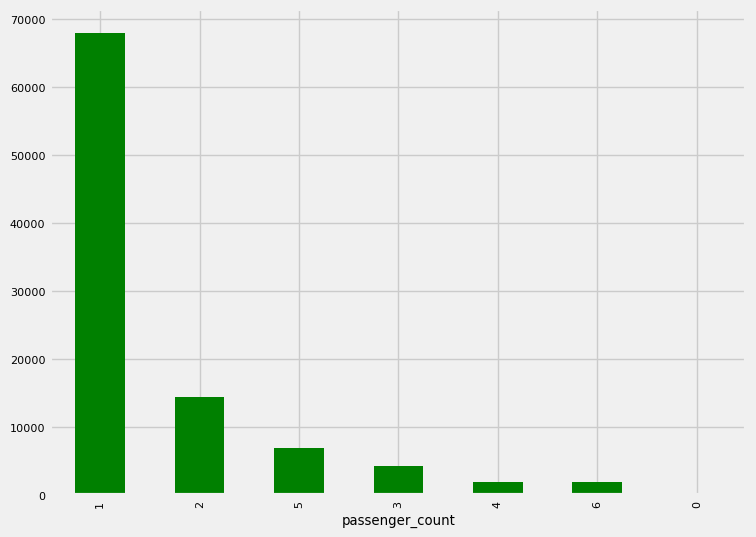

In [56]:
plt.figure(figsize=(8,6))
data['passenger_count'].value_counts().plot.bar(color='g')

In [57]:
data["passenger_count"].describe()

count   98046.00
mean        1.68
std         1.30
min         0.00
25%         1.00
50%         1.00
75%         2.00
max         6.00
Name: passenger_count, dtype: float64

In [58]:
data["passenger_count"].value_counts()

passenger_count
1    68026
2    14490
5     6927
3     4301
4     2015
6     1969
0      318
Name: count, dtype: int64

In [59]:
data.shape[0]

98046

In [60]:

for col in ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']:
    print(f'{col.capitalize():17}: 2.5% = {round(np.percentile(data[col], 2.5), 2):5} \t 97.5% = {round(np.percentile(data[col], 97.5), 2)}')


Pickup_latitude  : 2.5% = 40.69 	 97.5% = 40.8
Pickup_longitude : 2.5% = -74.01 	 97.5% = -73.87
Dropoff_latitude : 2.5% = 40.68 	 97.5% = 40.81
Dropoff_longitude: 2.5% = -74.01 	 97.5% = -73.87


In [61]:
data = data.loc[data['pickup_latitude'].between(40, 42)]
data = data.loc[data['pickup_longitude'].between(-75, -72)]
data = data.loc[data['dropoff_latitude'].between(40, 42)]
data = data.loc[data['dropoff_longitude'].between(-75, -72)]
print(f'New number of observations: {data.shape[0]}')

New number of observations: 98046


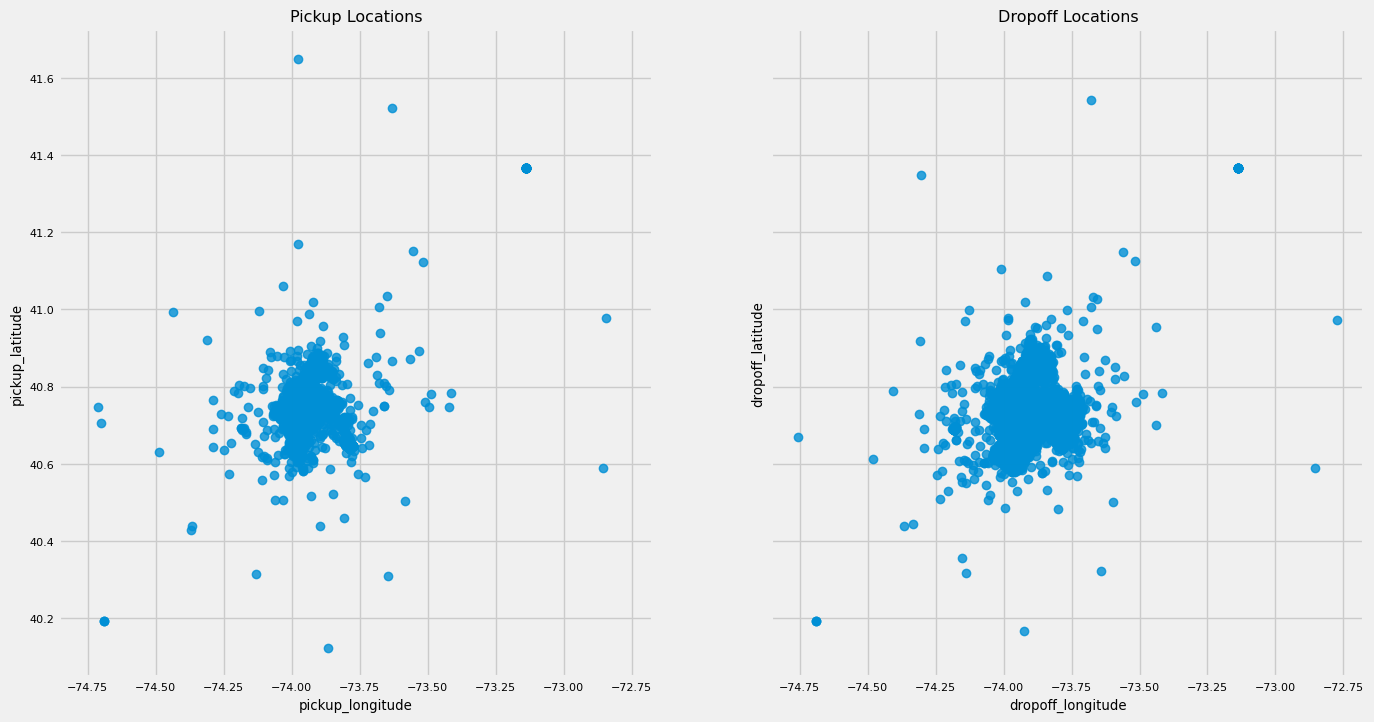

In [62]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot Longitude (x) and Latitude (y)
sns.regplot(x='pickup_longitude', y='pickup_latitude', fit_reg = False, 
            data = data, ax = axes[0]);
sns.regplot(x='dropoff_longitude',y='dropoff_latitude', fit_reg = False, 
            data = data, ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');

In [63]:
# Absolute difference in latitude and longitude
data['abs_lat_diff'] = (data['dropoff_latitude'] - data['pickup_latitude']).abs()
data['abs_lon_diff'] = (data['dropoff_longitude'] - data['pickup_longitude']).abs()


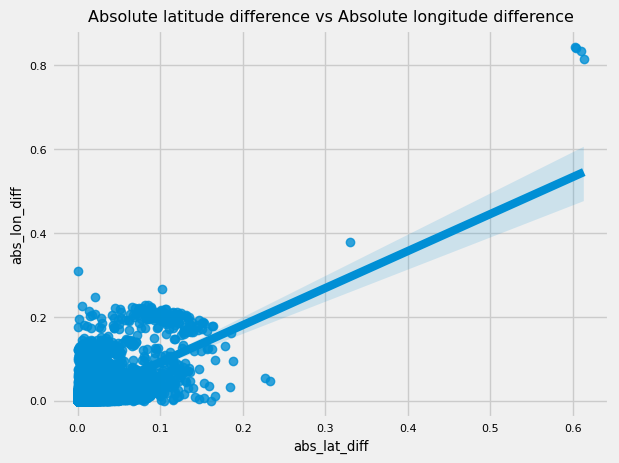

In [64]:
sns.regplot(x='abs_lat_diff',y='abs_lon_diff', fit_reg = True,
           data = data.sample(10000, random_state=RSEED));
plt.title('Absolute latitude difference vs Absolute longitude difference');

C:\Users\Aditya Dwivedi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Absolute latitude difference vs Absolute longitude difference')

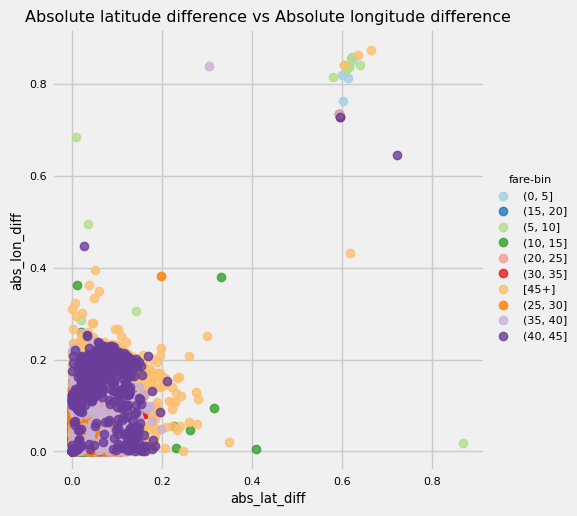

In [65]:
sns.lmplot(x='abs_lat_diff',y='abs_lon_diff', hue = 'fare-bin', palette=palette,
           fit_reg =False, data = data)
plt.title('Absolute latitude difference vs Absolute longitude difference')

C:\Users\Aditya Dwivedi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


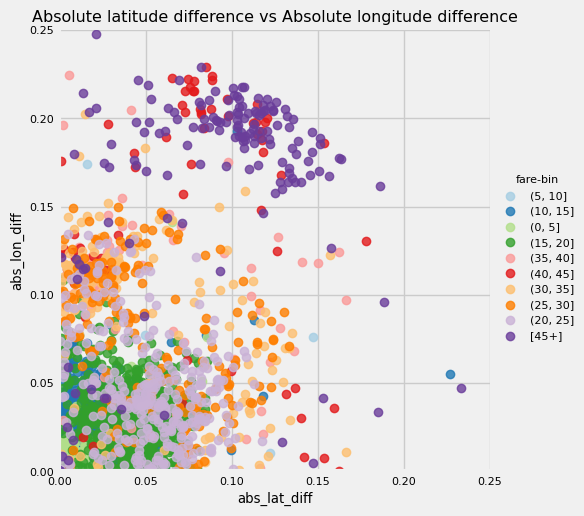

In [66]:
sns.lmplot(x='abs_lat_diff', y='abs_lon_diff', hue = 'fare-bin', palette = palette,
           fit_reg = False, data = data.sample(10000, random_state=RSEED));

plt.xlim((0.00, .25)); 
plt.ylim((0.00, .25))
plt.title('Absolute latitude difference vs Absolute longitude difference');

In [67]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p) # p=1 Manhattan distance, p=2 Eucledian distance

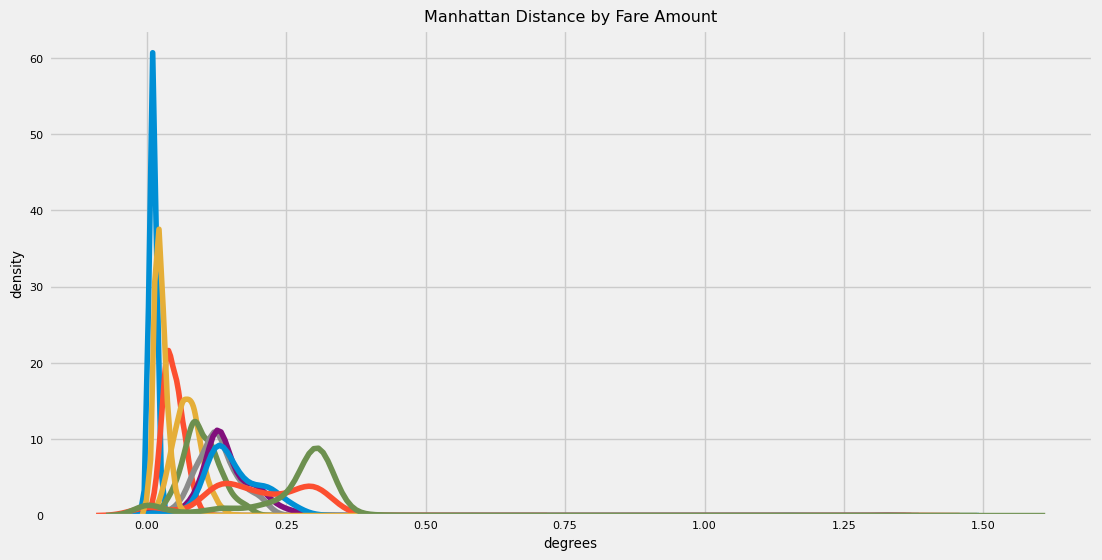

In [79]:
data['manhattan'] = minkowski_distance(data['pickup_longitude'], 
                                       data['dropoff_longitude'],
                                       data['pickup_latitude'],
                                       data['dropoff_latitude'], 1)
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['manhattan'], label = f'{f}');

   
plt.xlabel('degrees'); 
plt.ylabel('density');
plt.title('Manhattan Distance by Fare Amount');

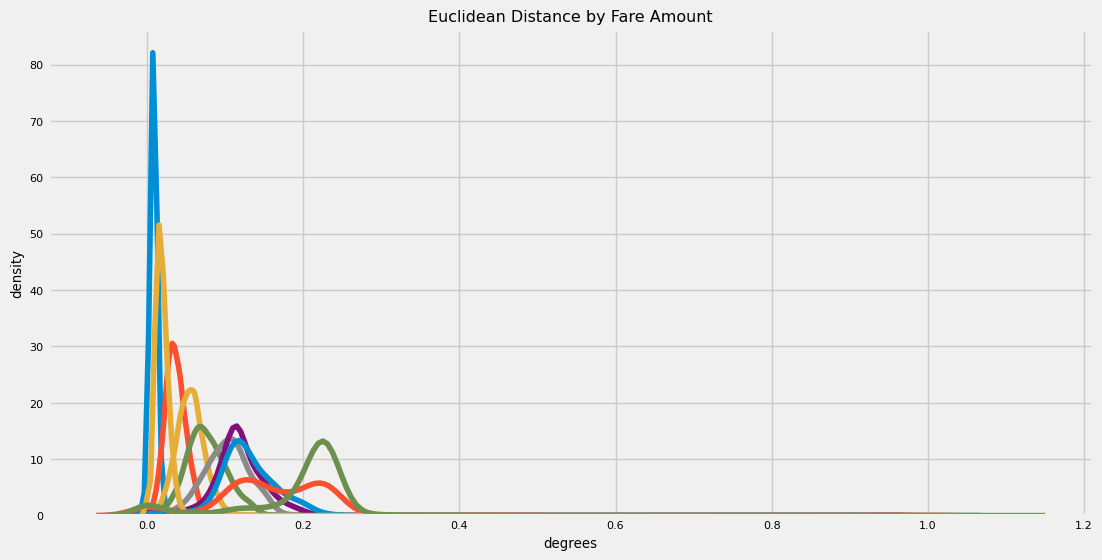

In [77]:
data['euclidean'] = minkowski_distance(data['pickup_longitude'], data['dropoff_longitude'],
                                       data['pickup_latitude'], 
                                       data['dropoff_latitude'], 2)

# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in data.groupby('fare-bin'):
    sns.kdeplot(grouped['euclidean'], label = f'{f}');

plt.xlabel('degrees'); 
plt.ylabel('density')
plt.title('Euclidean Distance by Fare Amount');

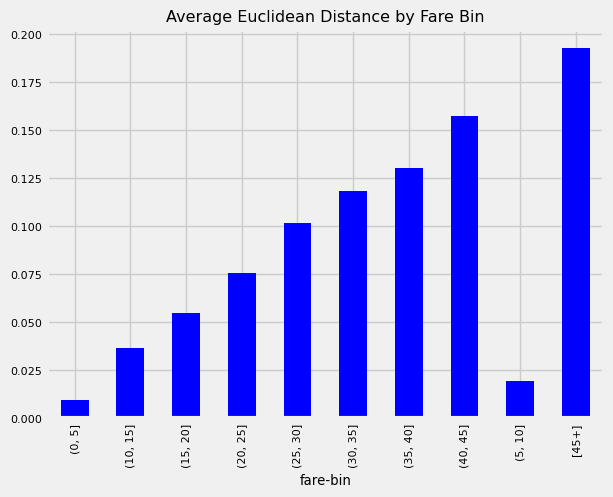

In [78]:
data.groupby('fare-bin')['euclidean'].mean().plot.bar(color = 'b'); # pandas
plt.title('Average Euclidean Distance by Fare Bin');

In [86]:
data.shape

(97728, 12)

In [94]:
data = data[data['passenger_count'].between(left = 1, right =6)]

In [95]:
data

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin,abs_lat_diff,abs_lon_diff,manhattan,euclidean
0,4.50,2009-06-15 17:26:21+00:00,-73.84,40.72,-73.84,40.71,1,"(0, 5]",0.01,0.00,0.01,0.01
1,16.90,2010-01-05 16:52:16+00:00,-74.02,40.71,-73.98,40.78,1,"(15, 20]",0.07,0.04,0.11,0.08
2,5.70,2011-08-18 00:35:00+00:00,-73.98,40.76,-73.99,40.75,2,"(5, 10]",0.01,0.01,0.02,0.01
3,7.70,2012-04-21 04:30:42+00:00,-73.99,40.73,-73.99,40.76,1,"(5, 10]",0.02,0.00,0.03,0.03
4,5.30,2010-03-09 07:51:00+00:00,-73.97,40.77,-73.96,40.78,1,"(5, 10]",0.02,0.01,0.03,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...
100166,7.00,2014-09-13 17:05:00+00:00,-73.96,40.78,-73.97,40.76,4,"(5, 10]",0.01,0.01,0.03,0.02
100167,8.90,2012-02-04 18:48:25+00:00,-73.99,40.74,-74.00,40.76,4,"(5, 10]",0.02,0.01,0.02,0.02
100168,6.90,2012-06-22 19:16:00+00:00,-73.96,40.77,-73.97,40.75,1,"(5, 10]",0.02,0.01,0.03,0.02
100169,12.00,2014-01-10 19:12:00+00:00,-73.97,40.75,-73.99,40.74,1,"(10, 15]",0.01,0.02,0.02,0.02


In [96]:
data.groupby("passenger_count").agg({"fare_amount":["mean", "count", "std", "min", "max"]})

fare_amount                        
                       mean  count  std  min    max
passenger_count                                    
1                     11.12  68026 9.14 2.50 100.00
2                     11.81  14490 9.98 2.50  96.25
3                     11.45   4301 9.14 2.50  93.75
4                     11.49   2015 9.74 2.50  96.70

Text(0.5, 1.0, 'Distribution of Fare Amount by Number of Passengers')

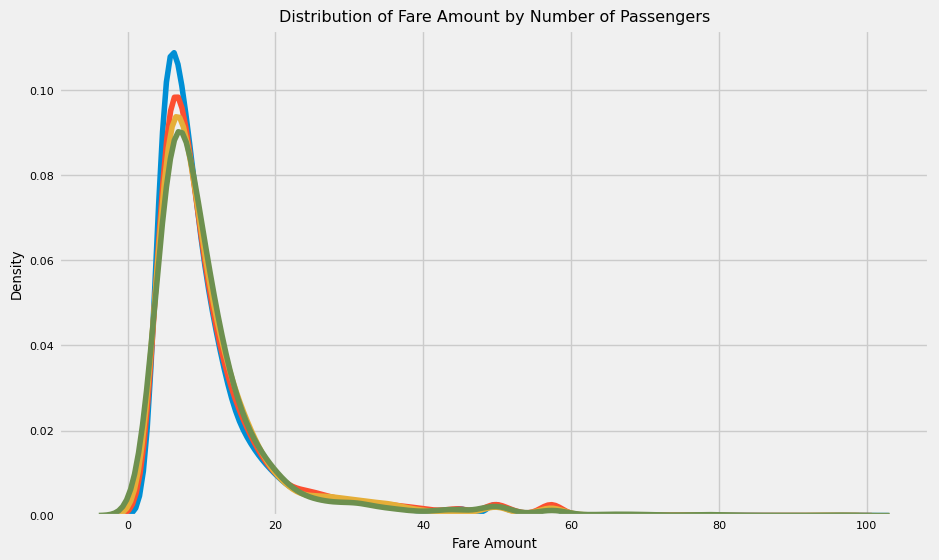

In [105]:
plt.figure(figsize=(10,6))
for f,grouped in data.groupby('passenger_count'):
    sns.kdeplot(grouped['fare_amount'])
    
plt.xlabel('Fare Amount')
plt.ylabel('Density')
plt.title('Distribution of Fare Amount by Number of Passengers')  
    

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(data, np.array(data['fare_amount']), 
                                                      stratify = data['fare-bin'],
                                                      random_state = RSEED, test_size = 0.3)

In [112]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest
random_forest = RandomForestRegressor(n_estimators = 20, max_depth = 20, 
                                      max_features = None,
                                      bootstrap = True, verbose = 1, n_jobs = -1)


In [113]:
Features=['euclidean', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']

In [114]:
random_forest.fit(X_train[Features], y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.4s finished


RandomForestRegressor(max_depth=20, max_features=None, n_estimators=20,
                      n_jobs=-1, verbose=1)

In [117]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

def metrics(train_pred, valid_pred, y_train, y_valid):
    """Calculate metrics:
       Root mean squared error and mean absolute percentage error"""
    
    # Root mean squared error
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))
    
    # Calculate absolute percentage error
    train_ape = abs((y_train - train_pred) / y_train)
    valid_ape = abs((y_valid - valid_pred) / y_valid)
    
    # Account for y values of 0
    train_ape[train_ape == np.inf] = 0
    train_ape[train_ape == -np.inf] = 0
    valid_ape[valid_ape == np.inf] = 0
    valid_ape[valid_ape == -np.inf] = 0
    
    train_mape = 100 * np.mean(train_ape)
    valid_mape = 100 * np.mean(valid_ape)
    
    return train_rmse, valid_rmse, train_mape, valid_mape






def evaluate(model, features, X_train, X_valid, y_train, y_valid):
    """Mean absolute percentage error"""
    
    # Make predictions
    train_pred = model.predict(X_train[features])
    valid_pred = model.predict(X_valid[features])
    
    # Get metrics
    train_rmse, valid_rmse, train_mape, valid_mape = metrics(train_pred, valid_pred,
                                                             y_train, y_valid)
    print(f'Training:   rmse = {round(train_rmse, 2)} \t mape = {round(train_mape, 2)}')
    print(f'Validation: rmse = {round(valid_rmse, 2)} \t mape = {round(valid_mape, 2)}')

In [118]:
evaluate(random_forest, Features,
         X_train, X_valid, y_train, y_valid)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Training:   rmse = 2.47 	 mape = 14.73
Validation: rmse = 4.33 	 mape = 23.46


[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
